# What are CNN?

A CNN, also known as a ConvNet, is one of the most widely used deep
learning algorithms for computer vision tasks.

CNNs consists of the following three important layers:
- The convolutional layer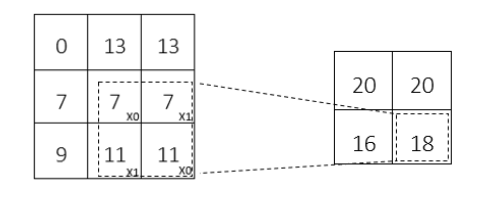

We are basically sliding the filter matrix
over the entire input matrix by one pixel, performing element-wise
multiplication and summing their results, which creates a new matrix called a
feature map or activation map. This is called the convolution operation.

The following diagram shows the actual image (the input image) and the
convolved image (the feature map). We can see that our filter has detected the
edges from the actual image as a feature:

- The pooling layer
- The fully connected layer

CNN is used for extracting important features from the image. CNN use filter matrix:

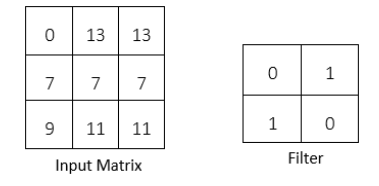

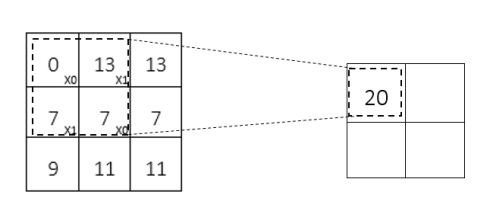

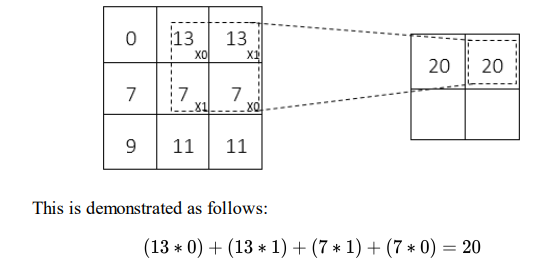

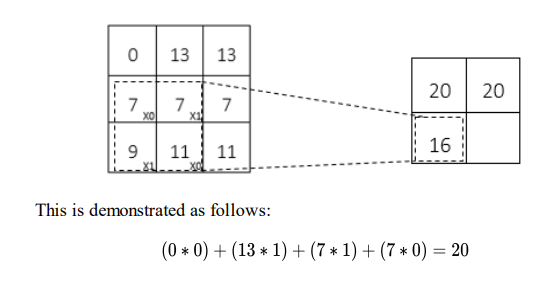

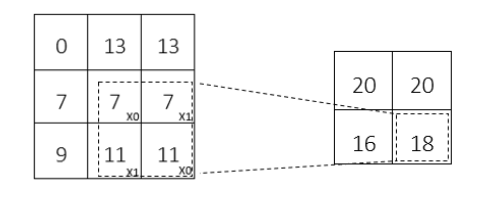

We are basically sliding the filter matrix
over the entire input matrix by one pixel, performing element-wise
multiplication and summing their results, which creates a new matrix called a
feature map or activation map. This is called the convolution operation.

The following diagram shows the actual image (the input image) and the
convolved image (the feature map). We can see that our filter has detected the
edges from the actual image as a feature:


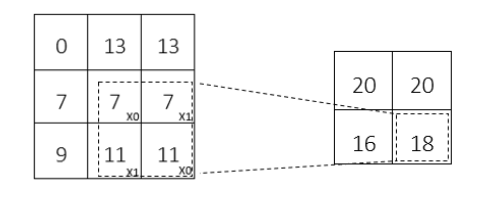

We are basically sliding the filter matrix
over the entire input matrix by one pixel, performing element-wise
multiplication and summing their results, which creates a new matrix called a
feature map or activation map. This is called the convolution operation.

The following diagram shows the actual image (the input image) and the
convolved image (the feature map). We can see that our filter has detected the
edges from the actual image as a feature:

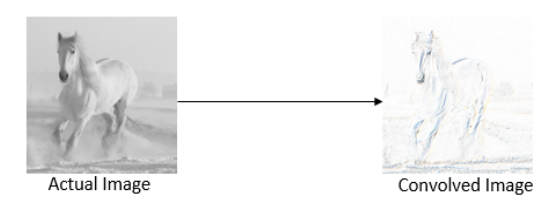


we can use multiple filters for extracting different features from the
image, and produce multiple feature maps. So, the depth of the feature map
will be the number of filters. If we use seven filters to extract different
features from the image, then the depth of our feature map will be seven:






### Strides

- The number of pixels we slide over the input matrix by the filter matrix is
called a stride. stride is
set to a small number

### Padding
There exists a situation where,
when we move our filter matrix by two pixels, it reaches the border and the
filter matrix does not fit the input matrix.

Padding with zeros on the input matrix is called same padding or
zero padding:
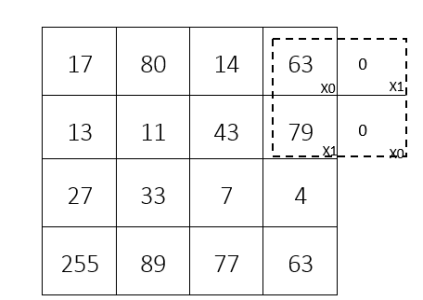

### Pooling Layers

It is used to reduce the dimensions of feature maps, we
perform a pooling operation.

A pooling operation is also
called a downsampling or subsampling operation, and it makes the CNN
translation invariant. Thus, the pooling layer reduces spatial dimensions by
keeping only the important features.

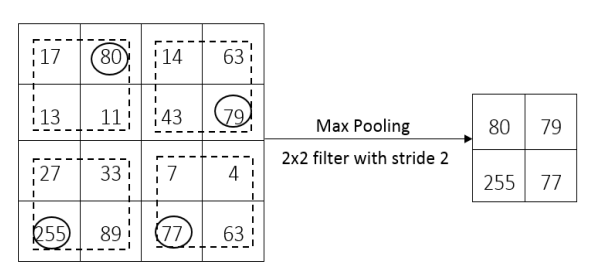

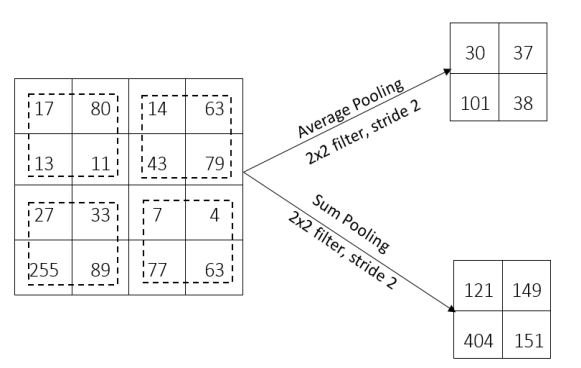

### Fully Connected Layers

The feedforward network takes this flattened feature
map as an input, applies an activation function, such as sigmoid, and returns
the output, stating whether the image contains a horse or not; this is called a
fully connected layer and is shown in the following diagram:

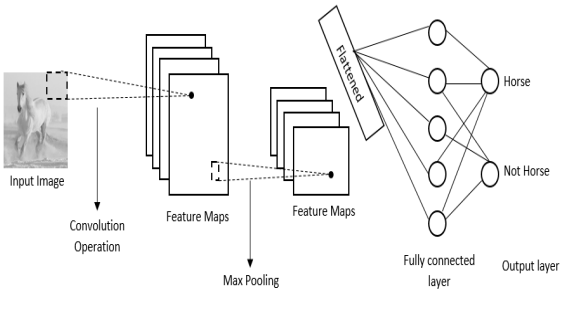


# The architecture of CNNs
The architecture of a CNN is shown in the following diagram:

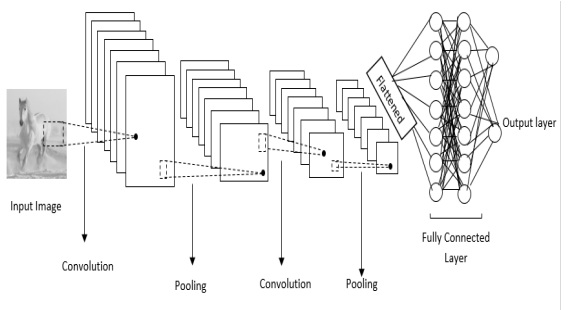



## Forward Propagation

Let's consider an input matrix, X, and filter, W, with
values shown as follows:

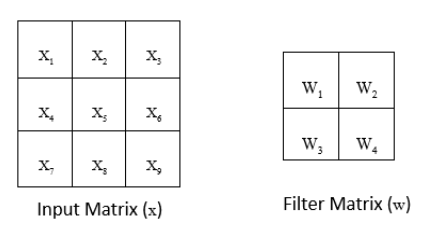

we take the filter, slide it over the input
matrix, perform a convolution operation, and produce the output matrix (the
feature map) just as we learned in the previous section:

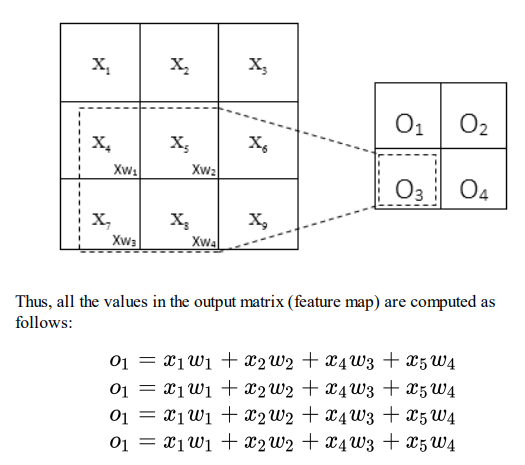

 Let's say
we have an input image, X, with a width of W and a height of H, and the filter
of size P x Q, then the convolution operation can be represented as follows:

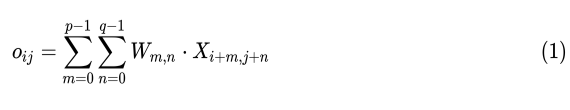

## Backward propagation  

we have predicted the output, we compute the loss, L. We use the mean
squared error as the loss function, that is, the mean of the squared difference
between the actual output, $ Y_{t} $ , and the predicted output, $ Y_{t} cap $ , which is given as
follows:

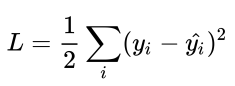

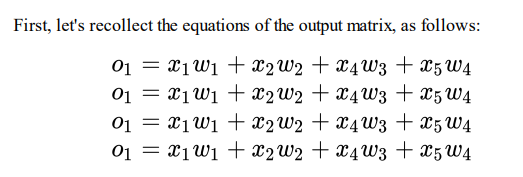

 we calculate the partial derivatives of the loss with
respect to w1 as follows:

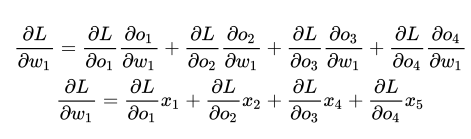

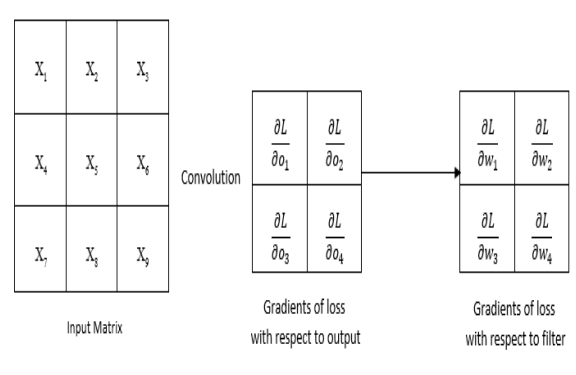

we understand that computing the gradients of loss with respect to the
filter (that is, weights) is just the convolution operation between the input
matrix and the gradient of loss with respect to the output as a filter matrix.

We also calculate the gradientd of loss with respect to an input for calculating the gradients of the filters present in the previous layers.

Our input matrix consists of nine values, from to , so we need to
calculate the gradients of loss with respect to all these nine values.

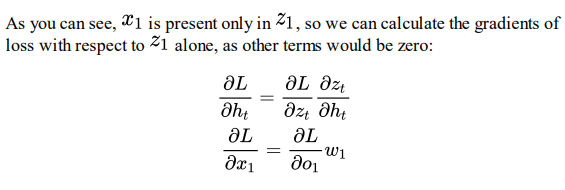

we calculate the gradients of loss with respect to all the
inputs as follows:

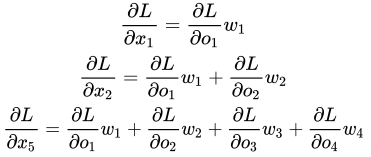

 Instead
of using the filter matrix directly, we rotate them 180 degrees and, also,
instead of performing convolution, we perform full convolution.

The following shows what the kernel rotated by 180 degrees looks like:
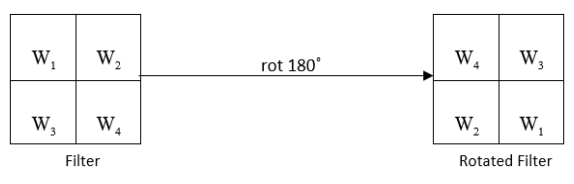

The shaded matrix represents the filter matrix and the unshaded one represents the input matrix:

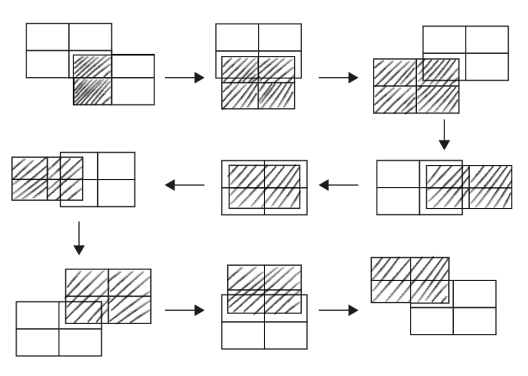


 we can say that the gradient of loss with respect to the input matrix can be
calculated using a full convolution operation between a filter rotated by 180
degrees as the input matrix and the gradient of the loss with respect to the
output as a filter matrix:

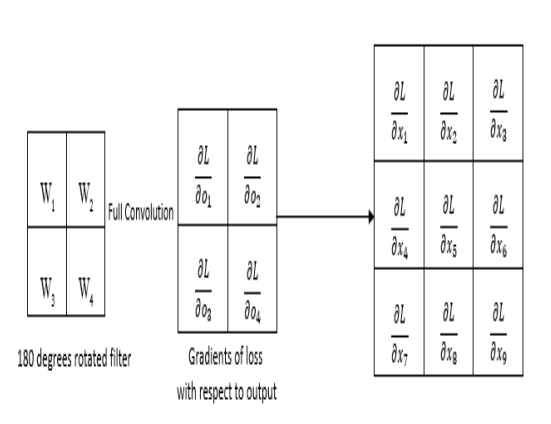

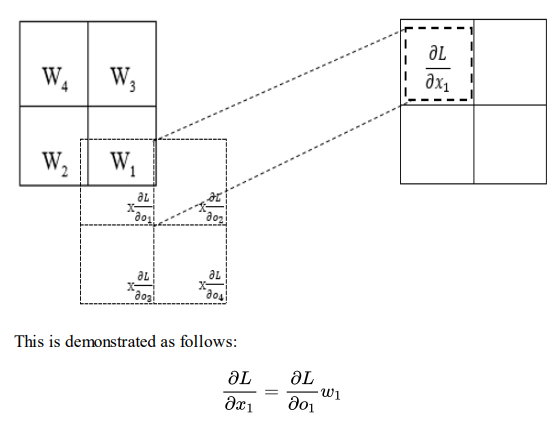

Thus, we understand that computing the gradients of loss with respect to the
input is just the full convolution operation. So, we can say that
backpropagation in CNN is just another convolution operation

<h1> Implementing a CNN in a TensorFlow</h1>


In [5]:
import warnings
warnings.filterwarnings('ignore')  

import numpy as np
import tensorflow as tf
# from tensorflow.compat.v1.examples.tutorials.mnist import input_data
# tf.logging.set_verbosity(tf.logging.ERROR)
tf.compat.v1.disable_eager_execution()
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets
%matplotlib inline

In [6]:
mnist_data, info = tensorflow_datasets.load("mnist", with_info=True, as_supervised=True)
train=(mnist_data["train"])
# train_df = tensorflow_datasets.as_dataframe(mnist_data["train"],info)

In [7]:
def initialize_weights(shape):
 return tf.Variable(tf.compat.v1.truncated_normal(shape, stddev=0.1))

def initialize_bias(shape):
 return tf.Variable(tf.compat.v1.constant(0.1, shape=shape))

def convolution(x, W):
 return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pooling(x):
 return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

def flatten_image(image, label):
  image = tf.reshape(image, [-1])  # Flatten the image
  return image, label

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0 # Normalize the images to [0, 1]
    image = tf.reshape(image, [-1])  # Flatten the image
    label = tf.one_hot(label, depth=10)  # One-hot encode the labels
    return image, label

X_ = tf.compat.v1.placeholder(tf.float32, [None, 784])
X = tf.reshape(X_, [-1, 28, 28, 1])
y = tf.compat.v1.placeholder(tf.float32, [None, 10])




In [8]:
W1 = initialize_weights([5,5,1,32])
b1 = initialize_bias([32])
conv1 = tf.compat.v1.nn.relu(convolution(X, W1) + b1)
pool1 = max_pooling(conv1)

W2 = initialize_weights([5,5,32,64])
b2 = initialize_bias([64])
conv2 = tf.compat.v1.nn.relu(convolution(pool1, W2) + b2)
pool2 = max_pooling(conv2)

flattened = tf.reshape(pool2, [-1, 7*7*64])
W_fc = initialize_weights([7*7*64, 1024])
b_fc = initialize_bias([1024])
fc_output = tf.compat.v1.nn.relu(tf.compat.v1.matmul(flattened, W_fc) + b_fc)

W_out = initialize_weights([1024, 10])
b_out = initialize_bias([10])
YHat = tf.compat.v1.nn.softmax(tf.compat.v1.matmul(fc_output, W_out) + b_out)

In [9]:
cross_entropy = -tf.compat.v1.reduce_sum(y*tf.compat.v1.log(YHat))
optimizer = tf.compat.v1.train.AdamOptimizer(1e-4).minimize(cross_entropy)

predicted_digit = tf.argmax(YHat, 1)
actual_digit = tf.argmax(y, 1)

correct_pred = tf.equal(predicted_digit,actual_digit)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [10]:

# hyperparameters
n_epochs =5
batch_size = 200
num_iterations = 60_000 // batch_size
session = tf.compat.v1.Session()
session.run(tf.compat.v1.global_variables_initializer())

In [11]:
train_batched = train.map(preprocess).batch(batch_size)

for epoch in range(n_epochs):

    # Create an iterator and initialize it
    iterator = tf.compat.v1.data.make_initializable_iterator(train_batched)
    next_batch = iterator.get_next()
    session.run(iterator.initializer)

    for i in range(num_iterations):
        # Fetch the next batch
        X_batch, y_batch = session.run(next_batch)

        # Train the network
        _, batch_loss, batch_accuracy = session.run(
            [optimizer, cross_entropy, accuracy],
            feed_dict={X_: X_batch, y: y_batch})

        # Print updates every 10 iterations
        if i % 100 == 0:
            print(f"Epoch: {epoch}, Iteration: {i}, Loss: {batch_loss}, Accuracy: {batch_accuracy}")

Epoch: 0, Iteration: 0, Loss: 1031.868408203125, Accuracy: 0.054999999701976776
Epoch: 0, Iteration: 100, Loss: 60.849952697753906, Accuracy: 0.9350000023841858
Epoch: 0, Iteration: 200, Loss: 52.712860107421875, Accuracy: 0.9100000262260437
Epoch: 1, Iteration: 0, Loss: 28.795434951782227, Accuracy: 0.9649999737739563
Epoch: 1, Iteration: 100, Loss: 31.73971176147461, Accuracy: 0.949999988079071
Epoch: 1, Iteration: 200, Loss: 29.020645141601562, Accuracy: 0.9549999833106995
Epoch: 2, Iteration: 0, Loss: 18.195833206176758, Accuracy: 0.9700000286102295
Epoch: 2, Iteration: 100, Loss: 21.854686737060547, Accuracy: 0.9599999785423279
Epoch: 2, Iteration: 200, Loss: 19.700437545776367, Accuracy: 0.9750000238418579
Epoch: 3, Iteration: 0, Loss: 13.878240585327148, Accuracy: 0.9800000190734863
Epoch: 3, Iteration: 100, Loss: 15.995513916015625, Accuracy: 0.9700000286102295
Epoch: 3, Iteration: 200, Loss: 15.023185729980469, Accuracy: 0.9750000238418579
Epoch: 4, Iteration: 0, Loss: 11.8365

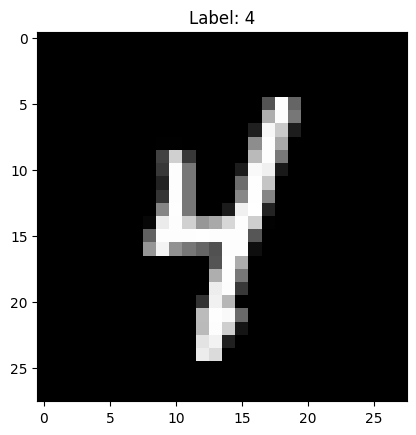

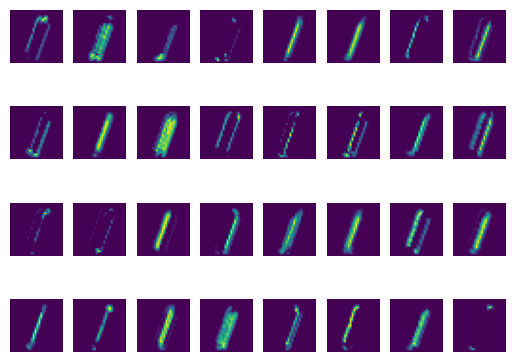

In [16]:
# Create an iterator for the dataset
ds_train_1_batched = train.batch(1)
iterator = tf.compat.v1.data.make_one_shot_iterator(ds_train_1_batched)
image, label = iterator.get_next()


image_val, label_val = session.run([image, label])
# Reshape and display the image using matplotlib
plt.imshow(image_val[0, :, :, 0], cmap='gray')  # MNIST images are grayscale
plt.title(f"Label: {label_val[0]}")
plt.show()

flatened_image, label = flatten_image(image, label)
reshaped_image = tf.reshape(flatened_image, [1, 784])
image_val, label_val = session.run([reshaped_image, label])

feature_map = session.run([conv1], feed_dict={X_: image_val})[0]


for i in range(32):
  feature = feature_map[:,:,:,i].reshape([28, 28])
  plt.subplot(4,8, i + 1)
  plt.imshow(feature)
  plt.axis('off')
plt.show()

<h1> Capsule Network</h1>

In [20]:
def squash(sj):
 sj_norm = tf.reduce_sum(tf.square(sj), -2, keepdims=True)
 scalar_factor = sj_norm / (1 + sj_norm) / tf.sqrt(sj_norm + 1e-6)
 vj = scalar_factor * sj 
 return vj

<h3>Dynamic Routing</h3>


In [30]:
def dynamic_routing(ui, bij, num_routing=10):
  wij = tf.compat.v1.get_variable('Weight', shape=(1, 1152, 160, 8, 1), dtype=tf.float32,
                        initializer=tf.random_normal_initializer(0.01))
  biases = tf.compat.v1.get_variable('bias', shape=(1, 1, 10, 16, 1))
  ui = tf.tile(ui, [1, 1, 160, 1, 1])
  u_hat = tf.reduce_sum(wij * ui, axis=3, keepdims=True)
  u_hat = tf.reshape(u_hat, shape=[-1, 1152, 10, 16, 1])
  u_hat_stopped = tf.stop_gradient(u_hat, name='stop_gradient')

  for r in range(num_routing):
    with tf.compat.v1.variable_scope('iter_' + str(r)):
      #step 1
      cij = tf.nn.softmax(bij, axis=2)
      #step 2
      if r == num_routing - 1:
        sj = tf.multiply(cij, u_hat)
        sj = tf.reduce_sum(sj, axis=1, keepdims=True) + biases
        vj = squash(sj)
      elif r < num_routing - 1:
        sj = tf.multiply(cij, u_hat_stopped)
        sj = tf.reduce_sum(sj, axis=1, keepdims=True) + biases
        vj = squash(sj)
        vj_tiled = tf.tile(vj, [1, 1152, 1, 1, 1])
        coupling_coeff = tf.reduce_sum(u_hat_stopped * vj_tiled, axis=3,
        keepdims=True)
        #step 3
        bij += coupling_coeff
  return vj

<h3>Computing primary and digit capsules</h3>

In [32]:
# for compatability with tf version 1
import tensorflow as tf
def conv2d(inputs, num_outputs, kernel_size, padding='VALID', activation=tf.nn.relu, scope=None, strides=[1,1,1,1]):
    with tf.compat.v1.variable_scope(scope, default_name='conv2d'):
        # Get the input channels
        input_channels = inputs.get_shape()[-1]
        # Define kernel shape
        kernel_shape = [kernel_size, kernel_size, int(input_channels), num_outputs]
        # Initialize weights (Glorot/Xavier initializer)
        weights = tf.compat.v1.get_variable(
            'weights', shape=kernel_shape, initializer=tf.compat.v1.glorot_uniform_initializer())
        # Initialize biases
        biases = tf.compat.v1.get_variable(
            'biases', shape=[num_outputs], initializer=tf.compat.v1.zeros_initializer())
        # Perform convolution
        conv = tf.nn.conv2d(inputs, weights, strides=strides, padding=padding)
        # Add bias
        conv = tf.nn.bias_add(conv, biases)
        # Apply activation function
        if activation:
            conv = activation(conv)
        return conv


graph = tf.Graph()
with graph.as_default() as g:
  x = tf.compat.v1.placeholder(tf.float32, [200, 784])
  y = tf.compat.v1.placeholder(tf.float32, [batch_size,10])
  x_image = tf.reshape(x, [-1,28,28,1])

  with tf.name_scope('convolutional_input'):
    input_data = conv2d(inputs=x_image, num_outputs=256,
                                          kernel_size=9, padding='VALID', activation=None, scope="conv1")
  capsules = []
  for i in range(8):
    with tf.name_scope('capsules_' + str(i)):
      #convolution operation
      output = conv2d(inputs=input_data, num_outputs=32,kernel_size=9,
                      strides=2, padding='VALID', activation=None, scope=f"conv2-{i}")
      #reshape the output
      output = tf.reshape(output, [batch_size, -1, 1, 1])
      #store the output which is capsule in the capsules list
      capsules.append(output)

  primary_capsule = tf.concat(capsules, axis=2)
  primary_capsule = squash(primary_capsule)

  with tf.name_scope('dynamic_routing'):
    #reshape the primary capsule
    outputs = tf.reshape(primary_capsule, shape=(batch_size, -1, 1,
                                                 primary_capsule.shape[-2], 1))
    #initialize bij with 0s
    bij = tf.constant(np.zeros([1, primary_capsule.shape[1], 10, 1, 1],
                               dtype=np.float32))
    #compute the digit capsules using dynamic routing algorithm which takes
    #the reshaped primary capsules and bij as inputs and returns the activity vector
    digit_capsules = dynamic_routing(outputs, bij)

  digit_capsules = tf.squeeze(digit_capsules, axis=1)

<h3>Masking Digit Capsule</h3>


In [34]:
with graph.as_default() as g:
  with tf.compat.v1.variable_scope('Masking'):
    #select the activity vector of given input image using the actual label y
    # and mask out others
    masked_v = tf.multiply(tf.squeeze(digit_capsules), tf.reshape(y, (-1, 10, 1)))
    

<h3> Define the Decoder</h3>


In [41]:
# for compatability with tensorflow v1
def dense_layer(inputs, num_outputs, activation_fn=None, scope=None):
    with tf.compat.v1.variable_scope(scope, default_name='dense_layer'):
        input_dim = inputs.get_shape()[-1]
        weights = tf.compat.v1.get_variable(
            'weights', shape=[input_dim, num_outputs], initializer=tf.compat.v1.glorot_uniform_initializer())
        biases = tf.compat.v1.get_variable(
            'biases', shape=[num_outputs], initializer=tf.zeros_initializer())
        outputs = tf.matmul(inputs, weights) + biases
        if activation_fn:
            outputs = activation_fn(outputs)
        return outputs
    
with graph.as_default() as g:
  with tf.name_scope('Decoder'):
    #masked digit capsule
    v_j = tf.reshape(masked_v, shape=(batch_size, -1))
    #first fully connected layer
    fc1 = dense_layer(v_j, num_outputs=512, scope="fc1")
    #second fully connected layer
    fc2 = dense_layer(fc1, num_outputs=1024, scope="fc2")
    #reconstructed image
    reconstructed_image = dense_layer(fc2, num_outputs=784, activation_fn=tf.sigmoid)

<h3>Accuracy and Loss</h3>

In [50]:
with graph.as_default() as g:
  with tf.compat.v1.variable_scope('accuracy'):
    v_length = tf.sqrt(tf.reduce_sum(tf.square(digit_capsules), axis=2, keepdims=True) + 1e-6)

    softmax_v = tf.nn.softmax(v_length, axis=1)

    argmax_idx = tf.compat.v1.to_int32(tf.argmax(softmax_v, axis=1))
    predicted_digit = tf.reshape(argmax_idx, shape=(batch_size, ))

    actual_digit = tf.compat.v1.to_int32(tf.argmax(y, axis=1))

    correct_pred = tf.equal(predicted_digit,actual_digit)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    
    
# Marginal Loss
with graph.as_default() as g:
  max_left = tf.square(tf.maximum(0.,0.9 - v_length))
  max_right = tf.square(tf.maximum(0., v_length - 0.1))

  T_k = y
  lambda_ = 0.5
  L_k = T_k * max_left + lambda_ * (1 - T_k) * max_right

  margin_loss = tf.reduce_mean(tf.reduce_sum(L_k, axis=1))

# Reconstruction Loss
with graph.as_default() as g:
  original_image = tf.reshape(x, shape=(batch_size, -1))
  squared = tf.square(reconstructed_image - original_image)
  reconstruction_loss = tf.reduce_mean(squared)
  
  
#  Total Loss
with graph.as_default() as g:
  alpha = 0.0005
  total_loss = margin_loss + alpha * reconstruction_loss

  optimizer = tf.compat.v1.train.AdamOptimizer(0.0001)
  train_op = optimizer.minimize(total_loss)


In [63]:
# hyperparameters
num_epochs =5
batch_size = 200
num_steps = 60_000 // batch_size
session = tf.compat.v1.Session()
session.run(tf.compat.v1.global_variables_initializer())

In [ ]:
with graph.as_default() as g:

  (ds_train, ds_test), ds_info = tensorflow_datasets.load(
      'mnist',
      split=['train', 'test'],
      shuffle_files=True,
      as_supervised=True,
      with_info=True,
  )

  ds_train_batched = ds_train.map(preprocess).batch(batch_size)

  with tf.compat.v1.Session(graph=graph) as sess:
    init_op = tf.compat.v1.global_variables_initializer()
    sess.run(init_op)

    for epoch in range(num_epochs):
      iterator = tf.compat.v1.data.make_initializable_iterator(ds_train_batched)
      next_batch = iterator.get_next()

      sess.run(iterator.initializer)

      for iteration in range(num_steps):
        #select some batch of data points according to the batch size (100)
        X_batch, y_batch = sess.run(next_batch)

        feed_dict = {x : X_batch, y : y_batch}
        _, loss, acc = sess.run([train_op, total_loss, accuracy], feed_dict=feed_dict)

        if iteration%100 == 0:
          print('Epoch: {}, iteration:{}, Loss:{} Accuracy:{}'.format(epoch,iteration,loss,acc))


Epoch: 0, iteration:0, Loss:0.5749418139457703 Accuracy:0.05999999865889549
